# 4.6 全连接网络后向传播可视化
    
建立一个三层的全连接网络（多层感知器）来进行同心圆数据分类并可视化其后向传播过程,

下列参数的修改请参见4.6.6 神经网络初始化与超参数设置中的注释，可自行做相关修改。
    
- 激活函数：ReLU
- 最后一层：Sigmoid
- 损失函数：Cross Entropy Loss
- 训练样本：make_circles


本例代码参考于下述博客。

- Author：Michael Nielsen
- Projiect：http://neuralnetworksanddeeplearning.com/index.html

## 4.6.1 导入相关库

In [2]:
import os
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from matplotlib import colormaps as cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from matplotlib.font_manager import FontProperties

## 4.6.2 整理数据为可训练格式

- 转换数据格式

- 构建样本整体坐标系

- 数据数值归一化

- 自定义colorbar

- 绘制训练样本的分布图


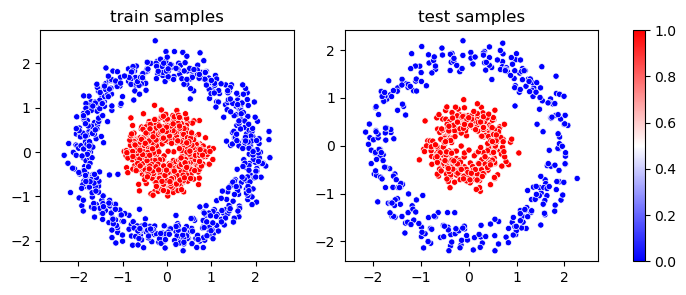

In [93]:
X,y= datasets.make_circles(n_samples = 2000, factor=0.3, noise=.1)
X, X_test, y, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# 转换数据格式
training_data = []
test_data = []
#构建特征空间
c,r = np.mgrid[[slice(X.min()- .2,X.max() + .2,50j)]*2]
p = np.c_[c.flat,r.flat]

# 归一化
ss = StandardScaler().fit(X)
X = ss.transform(X)
p = ss.transform(p)
X_test = ss.transform(X_test)
for k in range(len(y)):
    training_data.append([np.array([[X[k, 0]], [X[k, 1]]]), np.array([y[k]])])
for k in range(0, len(y_test), 10):
    test_data.append([np.array([[X_test[k, 0]], [X_test[k, 1]]]), np.array([y_test[k]])])

#可视化
fig = plt.figure(figsize = (9,3))
#自定义cmap
colors = [(1.0, 0.5, 0.0), (0.0, 0.0, 1.0)]  # 橘色和蓝色
cm_bright = ListedColormap(colors, name='OrangeBlue')
#数据样本的分布图
plt.subplot(121)
m1 = plt.scatter(*X.T,c = y,cmap = 'bwr',edgecolors='white',s = 20,linewidths = 0.5)
plt.title('train samples')
plt.axis('equal')
plt.subplot(122)
m2 = plt.scatter(*X_test.T,c = y_test,cmap = 'bwr',edgecolors='white',s = 20,linewidths = 0.5)
plt.title('test samples')
plt.axis('equal')
ax = fig.get_axes()
plt.colorbar(ax = ax)
# plt.show()

## 4.6.3 设置网络结构及其超参数,初始化网络，并进行训练

<span style="color:red;">**执行此步骤前，请先执行4.6.5节代码以定义一个神经网络，并可自行修改相关激活函数，损失，优化器等超参数**</span>

In [96]:
#设置网络结果
network_size = [2,3,2,1]
#训练次数
epoch = 10
#batch大小（单次训练样本个数）
batchsize = 1340
#学习率大小
learn_rate = 0.1
#初始化网络
net = Network(network_size)
#训练数据，并保存训练过程中间量
evaluation_cost, evaluation_accuracy, training_cost, training_accuracy ,training_loss, layers_bincode, Pl_z ,Pl_w ,  Pl_b  ,Pa_z, Pz_w, activations = net.SGD(p,training_data, epoch, batchsize,
                                                                                     learn_rate,test_data)

Epoch 0 training complete
Cost on training data: 0.8478296785130652
Accuracy on training data: 667 / 1340
Cost on evaluation data: 0.8117161447459775
Accuracy on evaluation data: 35 / 66
Epoch 1 training complete
Cost on training data: 0.8403866187585833
Accuracy on training data: 667 / 1340
Cost on evaluation data: 0.8052119713831628
Accuracy on evaluation data: 35 / 66
Epoch 2 training complete
Cost on training data: 0.8333373841562357
Accuracy on training data: 667 / 1340
Cost on evaluation data: 0.7990746111343562
Accuracy on evaluation data: 35 / 66
Epoch 3 training complete
Cost on training data: 0.8266533914244748
Accuracy on training data: 667 / 1340
Cost on evaluation data: 0.7932668298503178
Accuracy on evaluation data: 35 / 66
Epoch 4 training complete
Cost on training data: 0.8203099279254723
Accuracy on training data: 667 / 1340
Cost on evaluation data: 0.7877817595303976
Accuracy on evaluation data: 35 / 66
Epoch 5 training complete
Cost on training data: 0.81428593427437

## 4.6.4 可视化后向传播过程
将整个后向传播过程，每个节点上的各个求导量，各层节点之前权重和偏置的更新值在特征空间分布情况可视化出来，包括以下变量
- Pl_z: 每个节点上的误差delta
- Pl_w: 节点之间的权重更新量
- Pl_b: 节点之间的梯度更新量
- Pa_z: 激活值（输出值）对输入值的偏导数
- Pz_w, activations: 上一层的激活值（输出值）

请结合反向传播公式中各项式含义，再观察求导量与特征空间的划分形式。

反向传播公式：

1. 输出层误差计算：
$$
\delta^L = \nabla_a C \odot \sigma'(z^L)
$$
其中：
- $ \delta^L $ ：输出层的误差向量  
- $ \nabla_a C $ ：损失函数 $ C $ 对激活值 $ a $ 的梯度，即 $ \frac{\partial C}{\partial a^L_j} $  
- $ \sigma'(z^L) $ ：激活函数的导数，逐元素作用于 $ z^L $  
- $ \odot $ ：逐元素乘积（Hadamard 乘积）


2. 误差向后传播：
$$
\delta^l = (w^{l+1})^T \delta^{l+1} \odot \sigma'(z^l)
$$
其中：
- $ \delta^l $ ：隐藏层 $ l $ 的误差向量  
- $ w^{l+1} $ ：从第 $ l $ 层到第 $ l+1 $ 层的权重矩阵  
- $ (w^{l+1})^T $ ：$ w^{l+1} $ 的转置，使得误差可以从上一层传播回当前层  
- $ \delta^{l+1} $ ：下一层的误差向量  
- $ \sigma'(z^l) $ ：激活函数的导数，逐元素作用于 $ z^l $  


3. 计算偏导数：
$$
\frac{\partial C}{\partial b^l_j} = \delta^l
$$
其中：
- $ \frac{\partial C}{\partial b^l_j} $ ：损失函数 $ C $ 对偏置 $ b^l_j $ 的梯度  
- $ \delta^l $ ：误差项，直接用于更新偏置  


4. 计算权重梯度：
$$
\frac{\partial C}{\partial w^l_{jk}} = a^{l-1}_k \delta^l
$$
其中：
- $ \frac{\partial C}{\partial w^l_{jk}} $ ：损失函数 $ C $ 对权重 $ w^l_{jk} $ 的梯度  
- $ a^{l-1}_k $ ：上一层（$ l-1 $ 层）的第 $ k $ 个神经元的激活值  
- $ \delta^l $ ：本层（$ l $ 层）的误差  

/var/folders/kr/lttry5vd7gs18vdqw_6q3sjc0000gn/T/ipykernel_58875/1176074204.py:410: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  st = ax.scatter(*p.T, c=c, cmap=cmap)


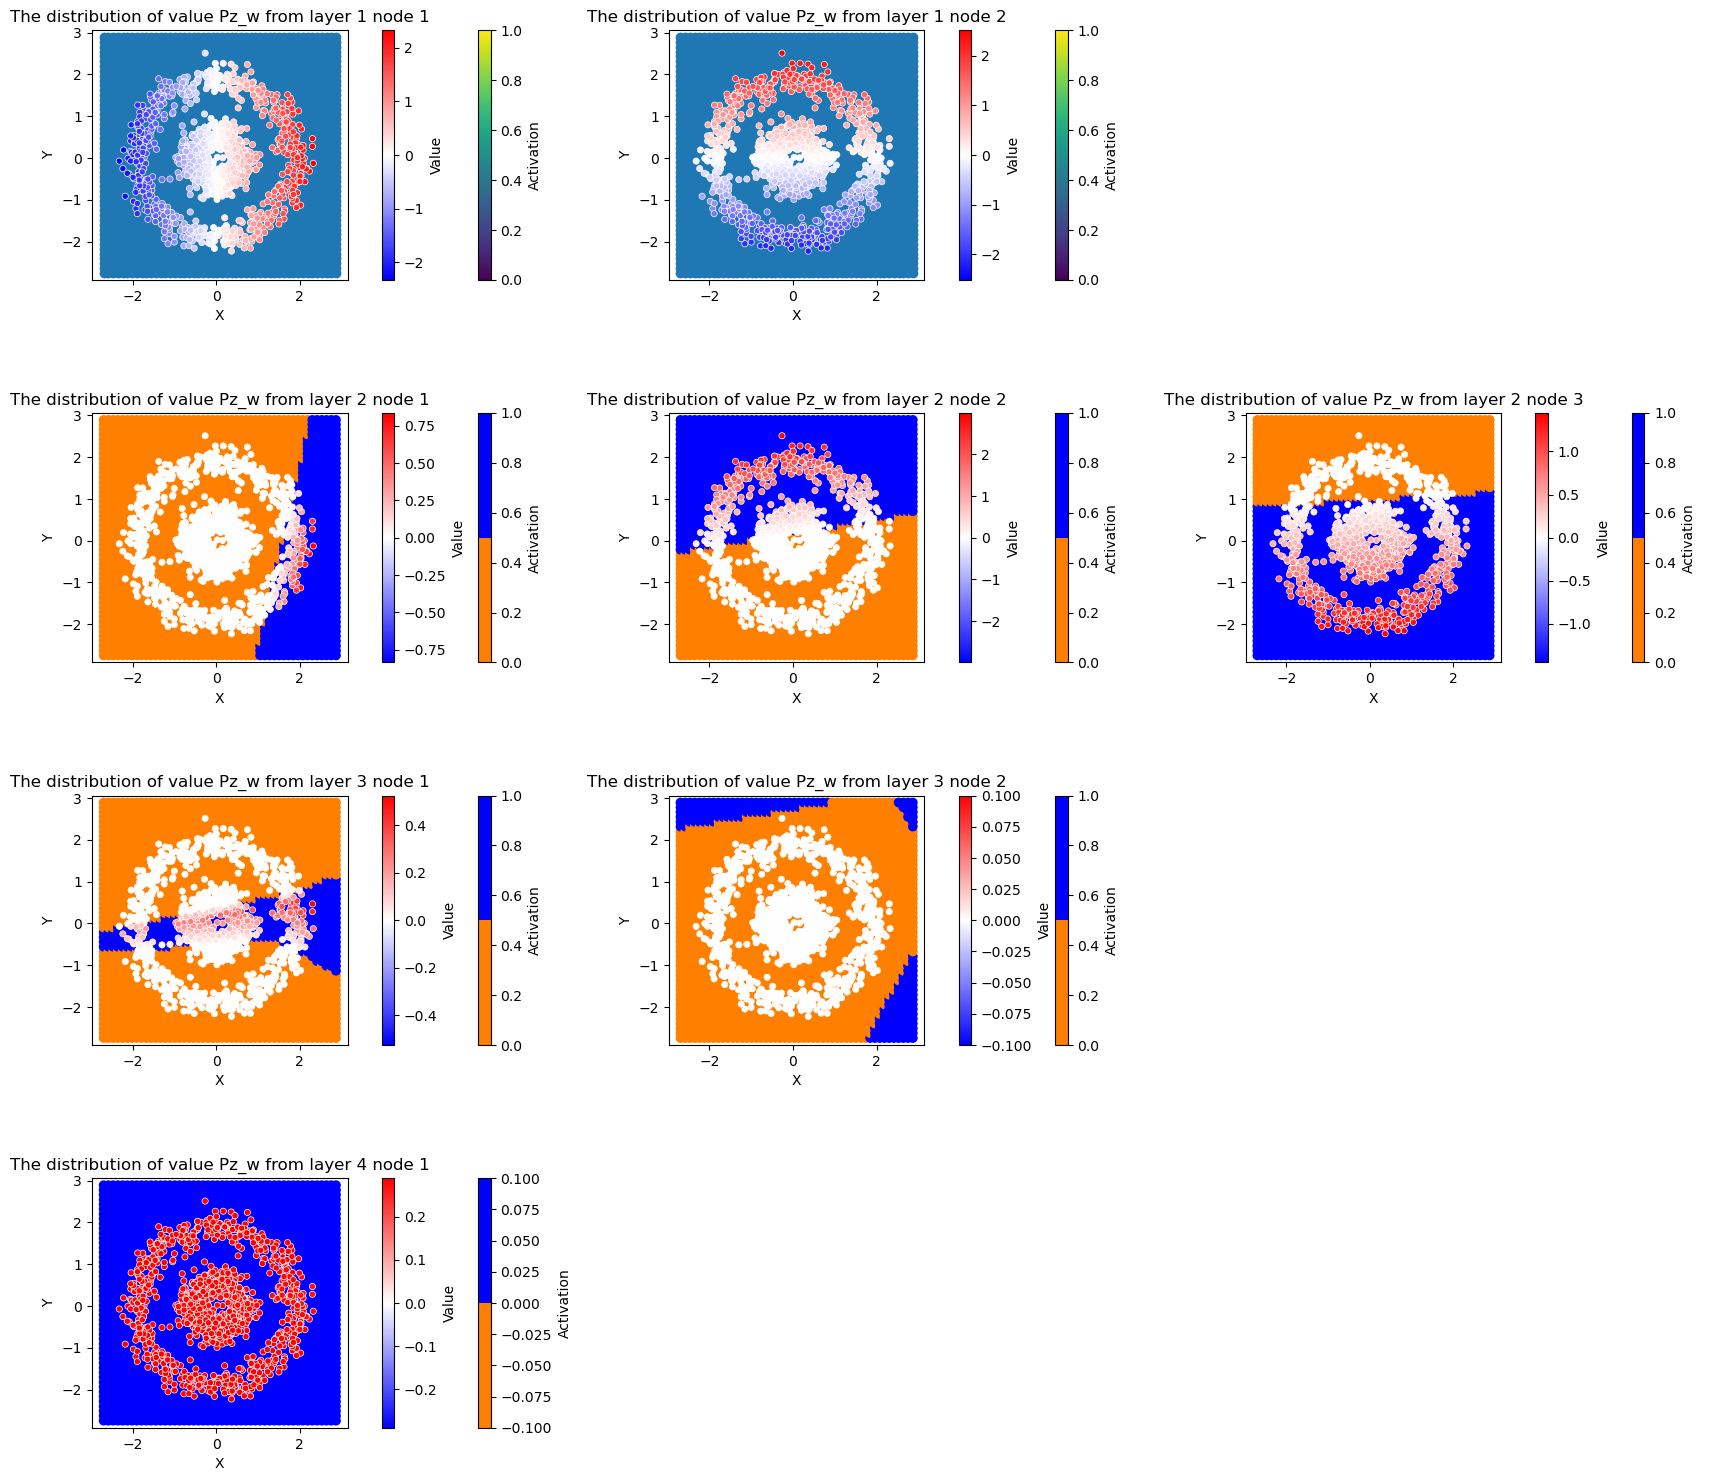

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# 设置参数
epoch = 9  # 训练轮次
value = 'Pz_w'  # 需要可视化的求导中间量
network_size = [2,3,2,1]  # 网络结构
max_nodes = max(network_size)  # 最大节点数

# 生成 layersBinCode
layersBinCode = None
for i in range(max_nodes):    
    layer_bincode = np.squeeze(np.array([x[i] for x in layers_bincode[epoch]]), axis=-1)
    layersBinCode = layer_bincode if layersBinCode is None else np.hstack((layersBinCode, layer_bincode))

# 计算特征空间的胞腔
layers_numcode = mapping(layersBinCode)

# 根据不同的value类型调整网络大小
network_size = network_size if value in ['Pz_w','Pl_w','activations'] else network_size[1:]
num_layers = len(network_size)

# 创建图形
if value in ['Pl_w']:
    # 为权重梯度创建特殊布局
    total_rows = sum(network_size[:-1])  # 计算实际需要的行数
    fig, axes = plt.subplots(total_rows, max_nodes, 
                            figsize=(max_nodes * 6, total_rows * 4))  # 增加图形大小
    
    # 默认关闭所有子图
    for ax in axes.flat:
        ax.axis('off')
    
    # 绘制每一层的权重梯度
    for layer_num in range(num_layers-1):
        num_nodes = network_size[layer_num]
        next_layer_nodes = network_size[layer_num + 1]
        row_offset = sum(network_size[:layer_num])
        
        for i in range(num_nodes):
            for j in range(next_layer_nodes):
                ax = axes[row_offset + i, j]
                ax.axis('on')
                
                # 提取数据并绘图
                y = np.squeeze(np.array([x[layer_num][j][i] for x in globals().get(value)[epoch]]))
                layer_bincode = np.squeeze(np.array([x[layer_num][j] for x in layers_bincode[epoch]]), axis=-1)
                scatter_plot = scatter(p, layer_bincode, X, y, 'bwr', ax=ax, cmap=cm_bright)
                ax.set_title('The distribution of value %s from layer %d node %d to layer %d node %d' % (value, layer_num + 1, i + 1, layer_num + 2, j + 1))
else:
    # 为其他类型创建标准布局
    fig, axes = plt.subplots(num_layers, max_nodes, 
                            figsize=(max_nodes * 6, num_layers * 4))  # 增加图形大小
    
    # 绘制每一层的节点
    for layer_num in range(num_layers):
        num_nodes = network_size[layer_num]
        for i in range(max_nodes):
            ax = axes[layer_num, i] if num_layers > 1 else axes[i]
            if i < num_nodes:
                # 提取数据并绘图
                y = np.squeeze(np.array([x[layer_num][i] for x in globals().get(value)[epoch]]))
                if value in ['Pz_w','activations']:
                    if layer_num == 0:
                        layer_bincode = None
                    else:
                        layer_bincode = np.squeeze(np.array([x[layer_num-1][i] for x in layers_bincode[epoch]]), axis=-1)
                else:
                    layer_bincode = np.squeeze(np.array([x[layer_num][i] for x in layers_bincode[epoch]]), axis=-1)

                scatter_plot = scatter(p, layer_bincode, X, y, 'bwr', ax=ax, cmap=cm_bright)
                
                # 设置标题
                ax.set_title('The distribution of value %s from layer %d node %d' % (value, layer_num + 1, i + 1))
            else:
                ax.axis('off')

plt.tight_layout(pad=5.0)  # 增加子图之间的间距
plt.show()

## 4.6.5 神经网络定义与超参数设置

此处超参数修改，请参照注释确定其含义后，再在每个类中添加相应函数

In [63]:
import json
import sys
import json
import random
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Define the activation function class
class Activation_Function(object):
    class sigmoid(object):
        @staticmethod
        def fn(z):
            return 1.0 / (1.0 + np.exp(-z))

        @staticmethod
        def prime(z):
            return Activation_Function.sigmoid.fn(z) * (1 - Activation_Function.sigmoid.fn(z))

    class softmax(object):
        @staticmethod
        def fn(z):
            z -= np.max(z)
            sm = (np.exp(z).T / np.sum(np.exp(z), axis=1))
            return sm

    class relu(object):
        @staticmethod
        def fn(z):
            z = (z + np.abs(z)) / 2.0
            return z

        @staticmethod
        def prime(z):
            z[z <= 0] = 0
            z[z > 0] = 1
            return z

# Define the loss function class
class cost_Function(object):
    class QuadraticCost(object):
        @staticmethod
        def fn(a, y):
            return 0.5 * np.linalg.norm(a - y) ** 2

    class CrossEntropyCost(object):
        @staticmethod
        def delta(z, a, y):
            return (a - y)

        @staticmethod
        def fn(a, y):
            return np.sum(np.nan_to_num(-y * np.log(a) - (1 - y) * np.log(1 - a)))

# Define fully connected layer, need to switch activate function, please modify activate to any one of the activate function class, you can also add your own activate function.
class FullyConnectedLayer(object):
    @staticmethod
    def feedforward(a, w, b, activate=Activation_Function.relu):
        z = np.dot(w, a) + b
        a = activate.fn(z)
        return z, a

    @staticmethod
    def backprop(z, a, w, delta, activate=Activation_Function.relu):
        sp = activate.prime(z)
        delta = np.dot(w.transpose(), delta) * sp
        nabla_b = delta
        nabla_w = np.dot(delta, a.transpose())
        return sp,nabla_b, nabla_w, delta


class Network(object):
    # The loss function defaults to CrossEntropyCost which can be replaced with any loss function under cost_Function, or you can add your own.
    def __init__(self, sizes, cost=cost_Function.CrossEntropyCost):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.cost = cost
        self.layers_bincode = []
        self.training_loss=[]
        self.Pl_z=[]
        self.Pl_w=[]
        self.Pl_b=[]
        self.Pa_z=[]
        self.Pz_w=[]
        self.Pl_a=[]
        self.activation=[]
        self.biases = [np.random.randn(y, 1) for y in self.sizes[1:]]
        self.weights = [np.random.randn(y, x) / np.sqrt(x)
                        for x, y in zip(self.sizes[:-1], self.sizes[1:])]

    # Initialize an SGD optimizer
    def SGD(self,p, training_data, epochs, mini_batch_size, eta,
            evaluation_data=None,
            monitor_evaluation_cost=True,
            monitor_evaluation_accuracy=True,
            monitor_training_cost=True,
            monitor_training_accuracy=True,
            early_stopping_n=0):

        # early stopping functionality:
        best_accuracy = 1   
        training_data = list(training_data)
        n = len(training_data)

        if evaluation_data:
            evaluation_data = list(evaluation_data)
            n_data = len(evaluation_data)

        # early stopping functionality:
        best_accuracy = 0
        no_accuracy_change = 0

        evaluation_cost, evaluation_accuracy,training_cost, training_accuracy ,training_loss,layers_bincode= [],[],[],[],[],[]
        Pl_z,Pl_w,Pl_b,Pz_w,Pa_z,Pl_a,activations=[],[],[],[],[],[],[]
        for j in range(epochs):
            # random.shuffle(training_data)
            mini_batches =  [training_data[k:k + mini_batch_size]  for k in range(0, n, mini_batch_size)]

            for mini_batch in mini_batches:
                    self.update_mini_batch( p,mini_batch, eta,  len(training_data))
            Pl_z.append(self.Pl_z)
            Pl_w.append(self.Pl_w)
            Pl_b.append(self.Pl_b)
            Pz_w.append(self.Pz_w)
            Pa_z.append(self.Pa_z)
            activations.append(self.activation)
            layers_bincode.append(self.layers_bincode)
            self.Pl_z,self.Pl_w,self.Pl_b,self.Pa_z,self.Pz_w,self.Pl_a,self.activation= [],[],[],[],[],[],[]
            self.layers_bincode=[]


            print("Epoch %s training complete" % j)

            if monitor_training_cost:
                cost_list,cost = self.total_cost(training_data,)
                training_loss.append(cost_list)
                training_cost.append(cost)
                print("Cost on training data: {}".format(cost))
            if monitor_training_accuracy:
                accuracy = self.accuracy(training_data)
                training_accuracy.append(accuracy)
                print("Accuracy on training data: {} / {}".format(accuracy, n))
            if monitor_evaluation_cost:
                cost = self.total_cost(evaluation_data)[-1]
                evaluation_cost.append(cost)
                print("Cost on evaluation data: {}".format(cost))
            if monitor_evaluation_accuracy:
                accuracy = self.accuracy(evaluation_data)
                evaluation_accuracy.append(accuracy)
                print("Accuracy on evaluation data: {} / {}".format(self.accuracy(evaluation_data), n_data))
            # plt.show()
            # Early stopping:
            if early_stopping_n > 0:
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    no_accuracy_change = 0
                    # print("Early-stopping: Best so far {}".format(best_accuracy))
                else:
                    no_accuracy_change += 1

                if (no_accuracy_change == early_stopping_n):
                    # print("Early-stopping: No accuracy change in last epochs: {}".format(early_stopping_n))
                    return evaluation_cost, evaluation_accuracy, training_cost, training_accuracy
        return evaluation_cost, evaluation_accuracy, \
               training_cost, training_accuracy,\
               training_loss, layers_bincode, Pl_z ,\
               Pl_w ,  Pl_b  ,Pa_z  ,Pz_w, activations\
 
    def update_mini_batch(self,p, mini_batch, eta, n):   
        self.nabla_b = [np.zeros(b.shape) for b in self.biases]
        self.nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            self.nabla_b = [nb + dnb for nb, dnb in zip(self.nabla_b, delta_nabla_b)]
            self.nabla_w = [nw + dnw for nw, dnw in zip(self.nabla_w, delta_nabla_w)]
        for x in p:
            layers_bincode=self.feedforward(np.expand_dims(x,axis=-1))[0]
            self.layers_bincode.append(layers_bincode)

        self.weights = [w - (eta / len(mini_batch)) * nw
                        for w, nw in zip(self.weights, self.nabla_w)]

        self.biases = [b - (eta / len(mini_batch)) * nb
                        for b, nb in zip(self.biases, self.nabla_b)]
    # Feedforward the network
    def feedforward(self, activation):
        activations = [activation]  
        zs = []  
        layers_bincode = []
        for i in range(self.num_layers - 2):
            z, activation = FullyConnectedLayer.feedforward(activation, self.weights[i], self.biases[i],
                                                            activate=Activation_Function.relu)
            # relu 大于 0 定义为激活
            layer_bincode = np.where(activation > 0, 1, 0)
            zs.append(z)
            activations.append(activation)
            layers_bincode.append(layer_bincode)
        z, activation = FullyConnectedLayer.feedforward(activation, self.weights[-1], self.biases[-1],
                                                        activate=Activation_Function.sigmoid)
        # sigmoid 大于 0.5 定义为激活
        layer_bincode = np.where(activation > 0.5, 1, 0)
        zs.append(z)
        activations.append(activation)
        layers_bincode.append(layer_bincode)
        return layers_bincode, zs, activations
    
    # Backpropagation
    def backprop(self, x, y):
        # feedforward
        Pl_z=[]
        Pa_z=[]
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # network
        layers_bincode, zs, activations = self.feedforward(x)
        # backward pass
        delta = (self.cost).delta(zs[-1], activations[-1], y)
        # Save all delta
        # Save the activation status and activation values of all nodes
        Pl_z.append(delta)

        Pa_z.append(Activation_Function.sigmoid.prime(activations[-1]))

        self.Pz_w.append(activations)
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())

        for l in range(2, self.num_layers):
            sp,nabla_b[-l], nabla_w[-l], delta = FullyConnectedLayer.backprop(zs[-l], activations[-l - 1],
                                                                           self.weights[-l + 1], delta,
                                                                activate=Activation_Function.relu)
            Pl_z.append(delta)
            Pa_z.append(sp)
        self.Pl_z.append(Pl_z[::-1])
        self.Pa_z.append(Pa_z[::-1])
        self.Pl_w.append(nabla_w)
        self.Pl_b.append(nabla_b)
        self.activation.append(activations)
        return  nabla_b, nabla_w

    def accuracy(self, data):
        results = [(self.feedforward(x)[-1][-1], y)
                    for (x, y) in data]
        result_accuracy = sum(int(round(x[0][0]) == y[0]) for (x, y) in results)
        return result_accuracy

    def total_cost(self, data):
        cost = 0.0
        cost_list=[]
        for x, y in data:
            a = self.feedforward(x)[-1][-1]
            cost_list.append(self.cost.fn(a, y))
            cost += self.cost.fn(a, y) / len(data)
        return cost_list,cost

    def save(self, filename):
        """Save the neural network to the file ``filename``."""
        data = {"sizes": self.sizes,
                "weights": [w.tolist() for w in self.weights],
                "biases": [b.tolist() for b in self.biases],
                "nabla_w": [w.tolist() for w in self.nabla_w],
                "nabla_b": [b.tolist() for b in self.nabla_b],
                "cost": str(self.cost)}
        f = open(filename, "w")
        json.dump(data, f)
        f.close()

    def plot_training_cost(self, training_cost, num_epochs, training_cost_xmin):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(np.arange(training_cost_xmin, num_epochs),
                training_cost[training_cost_xmin:num_epochs],
                color='#2A6EA6')
        ax.set_xlim([training_cost_xmin, num_epochs])
        ax.grid(True)
        ax.set_xlabel('Epoch')
        ax.set_title('Cost on the training data')
        return fig

    def plot_test_accuracy(self, test_accuracy, num_epochs, test_accuracy_xmin):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(np.arange(test_accuracy_xmin, num_epochs),
                [accuracy / 100.0
                 for accuracy in test_accuracy[test_accuracy_xmin:num_epochs]],
                color='#2A6EA6')
        ax.set_xlim([test_accuracy_xmin, num_epochs])
        ax.grid(True)
        ax.set_xlabel('Epoch')
        ax.set_title('Accuracy (%) on the test data')
        return fig

    def plot_test_cost(self, test_cost, num_epochs, test_cost_xmin):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(np.arange(test_cost_xmin, num_epochs),
                test_cost[test_cost_xmin:num_epochs],
                color='#2A6EA6')
        ax.set_xlim([test_cost_xmin, num_epochs])
        ax.grid(True)
        ax.set_xlabel('Epoch')
        ax.set_title('Cost on the test data')
        return fig

    def plot_training_accuracy(self, training_accuracy, num_epochs,
                               training_accuracy_xmin, training_set_size):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(np.arange(training_accuracy_xmin, num_epochs),
                [accuracy * 100.0 / training_set_size
                 for accuracy in training_accuracy[training_accuracy_xmin:num_epochs]],
                color='#2A6EA6')
        ax.set_xlim([training_accuracy_xmin, num_epochs])
        ax.grid(True)
        ax.set_xlabel('Epoch')
        ax.set_title('Accuracy (%) on the training data')
        return fig

    def accuracy_plot_overlay(self, test_accuracy, training_accuracy, num_epochs, 
                     training_set_size,test_set_size):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(np.arange(0, num_epochs),
                [accuracy * 100.0  /test_set_size
                 for accuracy in test_accuracy],
                color='#2A6EA6',
                label="Accuracy on the test data")
        ax.plot(np.arange(0, num_epochs),
                [accuracy * 100.0 / training_set_size
                 for accuracy in training_accuracy],
                color='#FFA933',
                label="Accuracy on the training data")
        ax.grid(True)
        ax.set_xlim([0, num_epochs])
        ax.set_xlabel('Epoch')
        #     ax.set_ylim([90, 100])
        plt.legend(loc="lower right")
        return fig

    def cost_plot_overlay(self, test_cost, train_cost, num_epochs):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(np.arange(0, num_epochs),
                train_cost[0:num_epochs],
                color='#FFA933',
                label="cost on the training data")
        ax.plot(np.arange(0, num_epochs),
                test_cost[0:num_epochs],
                color='#2A6EA6',
                label="cost on the test data")
        ax.grid(True)
        ax.set_xlim([0, num_epochs])
        ax.set_xlabel('Epoch')
        plt.legend(loc="lower right")
        return fig

def scatter(p, c, X, y, cm_bright, wb=None, wb_grand=None, cmap='berlin', ax = None):
    cols = p.shape[-1]
    assert cols in (1, 2, 3)
    if cols == 3:
        ax3d = ax
        if wb is not None:
            a1, a2 = p.min(0)[:2]
            b1, b2 = p.max(0)[:2]
            a, b = np.mgrid[a1 - 1:b1:10j, a2 - 1:b2:10j]
            (u1, u2, u3), b_ = wb
            # ax3d.plot([0, u1], [0, u2], [0, u3], 'r--')
            z_ = (a * u1 + b * u2 + b_) / (-u3)
            ax3d.plot_wireframe(a, b, z_)
        if wb_grand is not None:
            (w1, w2, w3), b_1 = wb_grand
            # ax3d.plot([u1, (u1 + w1)], [u2, (u2 + w2)], [u3, (u3 + w3)], 'g--')
            # ax3d.plot([0, (u1 + w1)], [0, (u2 + w2)], [0, (u3 + w3)], 'b--')
            z_ = (a * u1  + b * u2  + +b_+b_1) / (-u3 )
            ax3d.plot_wireframe(a, b, z_)
            z_ = (a * (u1 + w1) + b * (u2 + w2) + b_1) / (-(u3 + w3))
            ax3d.plot_wireframe(a, b, z_)

        point = ax3d.scatter(*X.T, c=y, cmap=cm_bright, edgecolors='white', s=40, linewidths=0.5)
        mp = ax3d.scatter(*p.T, c=c, cmap=cmap)
        plt.colorbar(mp, ax=ax, label='Activation', pad=0.1)
        plt.colorbar(point, ax=ax, label='Value', pad=0.1)

        ax3d.set_xlabel('X')
        ax3d.set_ylabel('Y')
        ax3d.set_zlabel('Z')
        return ax3d

    elif cols == 2:
        ax = ax
        ax.axis('equal')
        if wb is not None:
            a1, a2 = p.min(0) - 0.2
            b1, b2 = p.max(0) + 0.2
            (w1, w2), b_ = wb
            # ax.plot([0, w1 / 2], [0, w2 / 2], 'r--')
            y1, y2 = (a1 * w1 + b_) / (-w2), (b1 * w1 + b_) / (-w2)
            ax.plot([a1, b1], [y1, y2], 'r--')
            ax.set_ylim(a2, b2)
        if wb_grand is not None:
            (u1, u2), b_ = wb_grand
            ax.plot([a1, b1], [y1+b_, y2+b_], 'b--')
            # ax.plot([w1 / 2, (u1 + wb[0][0]) / 2], [w2 / 2, u2 / u1 * (u1 + wb[0][0]) / 2 + w2 / 2 - u2 * w1 / u1 / 2],
            #         'b--')
            (u1, u2) = (u1, u2) + wb[0]
            b_ = b_ + wb[1]
            # ax.plot([0, u1 / 2], [0, u2 / 2], 'g--')
            y1, y2 = (a1 * u1 + b_) / (-u2), (b1 * u1 + b_) / (-u2)
            ax.plot([a1, b1], [y1, y2], 'g--')
            ax.set_ylim(a2, b2)

        st = ax.scatter(*p.T, c=c, cmap=cmap)
        point = ax.scatter(*X.T, c=y, alpha=1, cmap=cm_bright, edgecolors='white', s=20, linewidths=0.5,vmin=-max(abs(y)),vmax=max(abs(y)))
        plt.colorbar(st, ax=ax, label='Activation', pad=0.1)
        plt.colorbar(point, ax=ax, label='Value', pad=0.1)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')


    else:
        ax = plt.gca()
        t, tt = np.zeros_like(p.flat), np.zeros_like(X.flat)
        st = plt.scatter(p.flat, t, c=c, cmap=cmap)
        point = ax.scatter(X.flat, tt, c=y, alpha=1, cmap=cm_bright, edgecolors='white', s=20, linewidths=0.5)
        plt.colorbar(st,ax=ax, label='Activation', pad=0.1)
        plt.colorbar(point,ax=ax, label='Value', pad=0.1)
    # There will be problems with 3D drawing plus equal.
    # plt.axis('equal')
    # plt.tight_layout()
    return ax


def mapping(code):
    numMap = np.zeros(code.shape[0])
    uniq = np.unique(code, axis=0)
    for i, arr in enumerate(uniq):
        m = (np.sum(code == arr, axis=1) == code.shape[-1])
        numMap[m] = i
    return numMap


#### Loading a Network
def load(filename):
    """Load a neural network from the file ``filename``.  Returns an
    instance of Network.

    """
    f = open(filename, "r")
    data = json.load(f)
    f.close()
    cost = getattr(sys.modules[__name__], data["cost"])
    net = Network(data["sizes"], cost=cost)
    net.weights = [np.array(w) for w in data["weights"]]
    net.biases = [np.array(b) for b in data["biases"]]
    return net


#### Miscellaneous functions
def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the j'th position
    and zeroes elsewhere.  This is used to convert a digit (0...9)
    into a corresponding desired output from the neural network.
    """
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e